In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import geopandas as gpd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/indian-states/Indian_states.shp
/kaggle/input/statedataset/state_2013.csv
/kaggle/input/statedataset/state_2012.csv
/kaggle/input/statedataset/state_2018.csv
/kaggle/input/statedataset/state_2015.csv
/kaggle/input/statedataset/state_2016.csv
/kaggle/input/statedataset/state_2017.csv
/kaggle/input/statedataset/state_2014.csv
/kaggle/input/statedataset/state_2011.csv
/kaggle/input/statedataset/state_2010.csv
/kaggle/input/indian-stat/Indian_states.shp
/kaggle/input/indian-stat/Indian_states.prj
/kaggle/input/indian-stat/Indian_states.dbf
/kaggle/input/indian-stat/Indian_states.shx
/kaggle/input/state-data/state_2012.csv
/kaggle/input/state-data/state_2011.csv
/kaggle/input/state-data/state_2010.csv
/kaggle/input/pre-cog/judges_clean/judges_clean.csv
/kaggle/input/pre-cog/acts_sections/acts_sections.csv
/kaggle/input/pre-cog/cases/cases_2015.csv
/kaggle/input/pre-cog/cases/cases_2012.csv
/kaggle/input/pre-cog/cases/cases_2018.csv
/kaggle/input/pre-cog/cases/cases_2013.csv
/k

In [2]:
case_2018 = pd.read_csv('/kaggle/input/pre-cog/cases/cases_2018.csv')
print(case_2018.head())

                ddl_case_id  year  state_code  dist_code  court_no  \
0  01-01-01-201900000012018  2018           1          1         1   
1  01-01-01-201900000022018  2018           1          1         1   
2  01-01-01-201900000032018  2018           1          1         1   
3  01-01-01-201900000042018  2018           1          1         1   
4  01-01-01-201900000052018  2018           1          1         1   

               cino             judge_position female_defendant  \
0  MHNB030000022018  chief judicial magistrate           0 male   
1  MHNB030000032018  chief judicial magistrate           0 male   
2  MHNB030000042018  chief judicial magistrate           0 male   
3  MHNB030000052018  chief judicial magistrate           0 male   
4  MHNB030000062018  chief judicial magistrate    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 m

In [3]:
case_2018_a = case_2018.drop(case_2018.iloc[:, 3:7],
                       axis = 1)
print(case_2018_a.head())

                ddl_case_id  year  state_code female_defendant  \
0  01-01-01-201900000012018  2018           1           0 male   
1  01-01-01-201900000022018  2018           1           0 male   
2  01-01-01-201900000032018  2018           1           0 male   
3  01-01-01-201900000042018  2018           1           0 male   
4  01-01-01-201900000052018  2018           1    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 male           -9999               0       1943        3315.0   
2            0 male           -9999               0       1943        5877.0   
3            0 male           -9999               0       1943         840.0   
4            0 male           -9999               1       1943         840.0   

   disp_name date_of_filing date_of_decision date_first_list date_last_list  \
0         33     2018-01-01       2018-02-0

In [4]:
case_2018_b = case_2018_a.drop(case_2018_a.iloc[:, 10:15],
                       axis = 1)
print(case_2018_b.head())

                ddl_case_id  year  state_code female_defendant  \
0  01-01-01-201900000012018  2018           1           0 male   
1  01-01-01-201900000022018  2018           1           0 male   
2  01-01-01-201900000032018  2018           1           0 male   
3  01-01-01-201900000042018  2018           1           0 male   
4  01-01-01-201900000052018  2018           1    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 male           -9999               0       1943        3315.0   
2            0 male           -9999               0       1943        5877.0   
3            0 male           -9999               0       1943         840.0   
4            0 male           -9999               1       1943         840.0   

   disp_name  
0         33  
1         52  
2         52  
3         52  
4          5  


In [5]:
type_name = pd.read_csv('/kaggle/input/pre-cog/keys/type_name_key.csv')
print(type_name.head())

   year  type_name         type_name_s  count
0  2010        1.0            (m) t.s.     18
1  2010        2.0                (sc)      2
2  2010        3.0          ..mact 166     97
3  2010        4.0  04 complaint cases     19
4  2010        5.0    04 criminal case     21


In [6]:
type_name.drop(type_name[type_name['year'] != 2018].index, inplace = True)

In [7]:
print(type_name.head())

       year  type_name            type_name_s  count
55181  2018        1.0               (m) t.s.    167
55182  2018        2.0  (mac) money execution      5
55183  2018        3.0               0.s.(la)      1
55184  2018        4.0    01 bail_application    355
55185  2018        5.0     01 criminal appeal     14


In [8]:
type_name.reset_index()

,index,year,type_name,type_name_s,count
0,55181,2018,1.0,(m) t.s.,167
1,55182,2018,2.0,(mac) money execution,5
2,55183,2018,3.0,0.s.(la),1
3,55184,2018,4.0,01 bail_application,355
4,55185,2018,5.0,01 criminal appeal,14
...,...,...,...,...,...
7528,62709,2018,7529.0,xxxxxspl t.ndps,3
7529,62710,2018,7530.0,zila panchayat act,217
7530,62711,2018,7531.0,zilla panchayat act,17
7531,62712,2018,7532.0,zima 457 cr.p.c.,9


In [9]:
type_name = type_name[(type_name['type_name_s'] == "divo cases") | (type_name['type_name_s'] == "divorce") | (type_name['type_name_s'] == "divorce case") | (type_name['type_name_s'] == "divorce on mutual consent") | (type_name['type_name_s'] == "divorce suit") | (type_name['type_name_s'] == "dmc") | (type_name['type_name_s'] == "dom viol") | (type_name['type_name_s'] == "domestic violence") | (type_name['type_name_s'] == "domestic violence ac") | (type_name['type_name_s'] == "domestic violence act 2005") | (type_name['type_name_s'] == "domestic violence act.") | (type_name['type_name_s'] == "domestic violence cases") | (type_name['type_name_s'] == "domestic voilenceact") | (type_name['type_name_s'] == "domestice violence act") | (type_name['type_name_s'] == "dop") | (type_name['type_name_s'] == "dowry prohibition act")]

In [10]:
print(type_name)

       year  type_name                 type_name_s  count
57606  2018     2426.0                  divo cases    165
57607  2018     2427.0                     divorce    334
57608  2018     2428.0                divorce case    395
57610  2018     2430.0   divorce on mutual consent   1710
57612  2018     2432.0                divorce suit     24
57614  2018     2434.0                         dmc  13122
57617  2018     2437.0                    dom viol      1
57622  2018     2442.0           domestic violence   1004
57624  2018     2444.0        domestic violence ac    161
57626  2018     2446.0  domestic violence act 2005   1883
57629  2018     2449.0      domestic violence act.   1483
57631  2018     2451.0     domestic violence cases    369
57633  2018     2453.0        domestic voilenceact    334
57634  2018     2454.0      domestice violence act    899
57636  2018     2456.0                         dop    720
57639  2018     2459.0       dowry prohibition act     89


In [11]:
type_name = type_name.drop(['year'], axis=1)

In [12]:
mer_2018 = case_2018_b.merge(type_name, left_on="type_name", right_on="type_name", how="left")
print(mer_2018.head())

                ddl_case_id  year  state_code female_defendant  \
0  01-01-01-201900000012018  2018           1           0 male   
1  01-01-01-201900000022018  2018           1           0 male   
2  01-01-01-201900000032018  2018           1           0 male   
3  01-01-01-201900000042018  2018           1           0 male   
4  01-01-01-201900000052018  2018           1    -9998 unclear   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0            0 male           -9999               0       1943        2975.0   
1            0 male           -9999               0       1943        3315.0   
2            0 male           -9999               0       1943        5877.0   
3            0 male           -9999               0       1943         840.0   
4            0 male           -9999               1       1943         840.0   

   disp_name type_name_s  count  
0         33         NaN    NaN  
1         52         NaN    NaN  
2         52        

In [13]:
mer_2018.dropna(subset=['type_name_s'], inplace=True)
print(mer_2018.head())

                     ddl_case_id  year  state_code female_defendant  \
678488  01-23-02-201300000012018  2018           1           0 male   
678489  01-23-02-201300000022018  2018           1           0 male   
678490  01-23-02-201300000032018  2018           1           0 male   
678491  01-23-02-201300000042018  2018           1           0 male   
678492  01-23-02-201300000052018  2018           1           0 male   

       female_petitioner  female_adv_def  female_adv_pet  type_name  \
678488          1 female           -9999           -9999       2451   
678489     -9998 unclear           -9999           -9999       2451   
678490          1 female           -9999           -9999       2451   
678491            0 male           -9999           -9999       2451   
678492     -9998 unclear           -9999           -9999       2451   

        purpose_name  disp_name              type_name_s  count  
678488        3799.0         23  domestic violence cases  369.0  
678489        

In [14]:
st = pd.read_csv('/kaggle/input/pre-cog/keys/cases_state_key.csv')
print(st.head())

   year  state_code      state_name pc11_state_name  pc11_state_id
0  2018           2  Andhra Pradesh  andhra pradesh             28
1  2011           2  Andhra Pradesh  andhra pradesh             28
2  2011          29       Telangana  andhra pradesh             28
3  2010          29       Telangana  andhra pradesh             28
4  2014           2  Andhra Pradesh  andhra pradesh             28


In [15]:
st.drop(st[st['year'] != 2018].index, inplace = True)

In [17]:
print(st.head())

    year  state_code      state_name pc11_state_name  pc11_state_id
0   2018           2  Andhra Pradesh  andhra pradesh             28
5   2018          29       Telangana  andhra pradesh             28
22  2018           6           Assam           assam             18
29  2018           8           Bihar           bihar             10
41  2018          27      Chandigarh      chandigarh              4


In [24]:
mst = mer_2018.merge(st, left_on="state_code", right_on="state_code", how="right")
print(mst.head())

                ddl_case_id  year_x  state_code    female_defendant  \
0  02-21-01-206400000792018  2018.0           2  -9999 missing name   
1  02-21-01-206400003352018  2018.0           2       -9998 unclear   
2  02-21-01-206400003372018  2018.0           2  -9999 missing name   
3  02-21-01-206400003382018  2018.0           2            1 female   
4  02-21-01-206400005102018  2018.0           2            1 female   

  female_petitioner  female_adv_def  female_adv_pet  type_name  purpose_name  \
0          1 female         -9999.0         -9998.0     2456.0         746.0   
1            0 male         -9999.0             0.0     2456.0        2894.0   
2            0 male         -9999.0             0.0     2456.0        5877.0   
3          1 female         -9999.0             0.0     2456.0        2894.0   
4          1 female         -9999.0             1.0     2456.0        2894.0   

   disp_name type_name_s  count  year_y      state_name pc11_state_name  \
0        5.0     

In [25]:
mst_final = mst.groupby(['state_name'])['ddl_case_id'].count().reset_index()

In [26]:
print(mst_final)

           state_name  ddl_case_id
0      Andhra Pradesh            6
1               Assam           88
2               Bihar         1331
3          Chandigarh            0
4        Chhattisgarh            0
5      DNH at Silvasa            0
6               Delhi            0
7       Diu and Daman            0
8                 Goa            0
9             Gujarat            0
10            Haryana         6424
11   Himachal Pradesh         1639
12  Jammu and Kashmir          288
13          Jharkhand            0
14          Karnataka            0
15             Kerala            0
16             Ladakh            2
17     Madhya Pradesh            0
18        Maharashtra          757
19            Manipur            0
20          Meghalaya            0
21            Mizoram           24
22             Orissa          410
23             Punjab         6698
24          Rajasthan          801
25             Sikkim            0
26         Tamil Nadu          714
27          Telangan

In [28]:
mst_final.replace("Orissa", 
           "Odisha", 
           inplace=True)

mst_final.replace("DNH at Silvasa", 
           "Dadara & Nagar Havelli", 
           inplace=True)

mst_final.replace("Diu and Daman", 
           "Daman & Diu", 
           inplace=True)

mst_final.replace("Jammu and Kashmir", 
           "Jammu & Kashmir", 
           inplace=True)

mst_final.replace("Delhi", 
           "NCT of Delhi", 
           inplace=True)

print(mst_final)

                state_name  ddl_case_id
0           Andhra Pradesh            6
1                    Assam           88
2                    Bihar         1331
3               Chandigarh            0
4             Chhattisgarh            0
5   Dadara & Nagar Havelli            0
6             NCT of Delhi            0
7              Daman & Diu            0
8                      Goa            0
9                  Gujarat            0
10                 Haryana         6424
11        Himachal Pradesh         1639
12         Jammu & Kashmir          288
13               Jharkhand            0
14               Karnataka            0
15                  Kerala            0
16                  Ladakh            2
17          Madhya Pradesh            0
18             Maharashtra          757
19                 Manipur            0
20               Meghalaya            0
21                 Mizoram           24
22                  Odisha          410
23                  Punjab         6698


In [29]:
shp = gpd.read_file('/kaggle/input/indian-stat/Indian_states.shp')
state_map = shp.set_index('st_nm').join(mst_final.set_index('state_name'))
print(state_map)

                                                                   geometry  \
st_nm                                                                         
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Arunanchal Pradesh        POLYGON ((96.16261 29.38078, 96.16860 29.37432...   
Assam                     MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...   
Bihar                     MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...   
Chandigarh                POLYGON ((76.84147 30.75996, 76.83599 30.73623...   
Chhattisgarh              POLYGON ((83.33532 24.09885, 83.35346 24.09627...   
Dadara & Nagar Havelli    POLYGON ((73.20657 20.12216, 73.20797 20.10650...   
Daman & Diu               MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...   
Goa                       MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...   
Gujarat                   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...   
Haryana                   POLYGON ((76.85065 30.8751

In [30]:
state_map['ddl_case_id'] = state_map['ddl_case_id'].fillna(0)

In [32]:
gender_state_2018 = state_map.iloc[:,[1]]
print(gender_state_2018)

                          ddl_case_id
st_nm                                
Andaman & Nicobar Island          0.0
Arunanchal Pradesh                0.0
Assam                            88.0
Bihar                          1331.0
Chandigarh                        0.0
Chhattisgarh                      0.0
Dadara & Nagar Havelli            0.0
Daman & Diu                       0.0
Goa                               0.0
Gujarat                           0.0
Haryana                        6424.0
Himachal Pradesh               1639.0
Jammu & Kashmir                 288.0
Jharkhand                         0.0
Karnataka                         0.0
Kerala                            0.0
Lakshadweep                       0.0
Madhya Pradesh                    0.0
Maharashtra                     757.0
Manipur                           0.0
Meghalaya                         0.0
Mizoram                          24.0
Nagaland                          0.0
NCT of Delhi                      0.0
Puducherry  

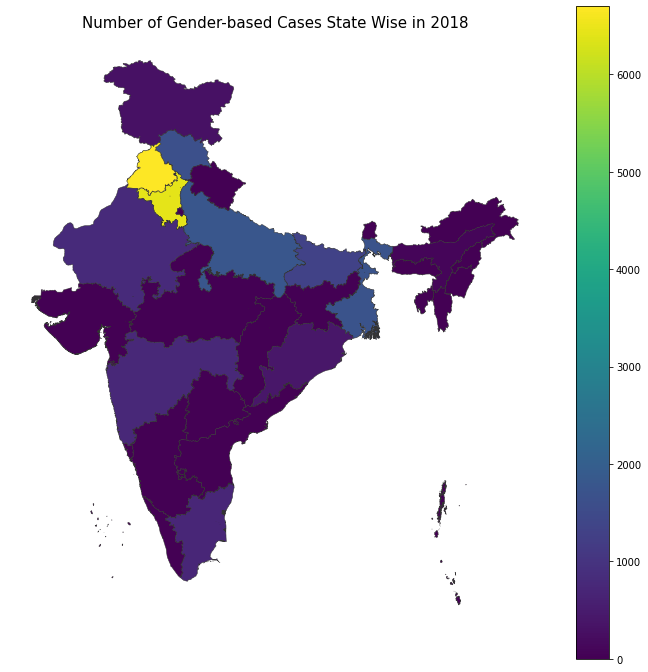

In [37]:
fig, ax = plt.pyplot.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Number of Gender-based Cases State Wise in 2018',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = state_map.plot(column='ddl_case_id', cmap='viridis', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

plt.pyplot.savefig('gender_state_map_2018.png')

In [38]:
gender_state_2018.to_csv('gender_state_2018.csv')